# Practicum II
## Author: Chenxi Cai,   Anna Daccache

## Task 2  ERD in Crow's Foot notation
### Task 2A
After we read the description of all the IMDb tables, we created the first version of ERD. The title_akas, title_basic, title_rating, title_episode and title_crew tables are all about title and all of them have the tconst or titleId column which is primary key or part of the primary key (title.akas uses titleId + ordering as a composite primary key). Therefore, we connect them with association relationships and the main table is title.basic because it is the 'basic' table. Another table called name_basic is the table containing all information about people. And the title.principal table has information about title and people. Therefore, it should be connected to both name.basic and title.basic. Because every title has more than one principals and one principal should belong to at least one title, we assigne a 1:N relationship to the title.basic and principal table. As shown in this ERD, we can see there are still many multi-valued attributes and many-to-many relationships. We will normalize them in the second ERD image.

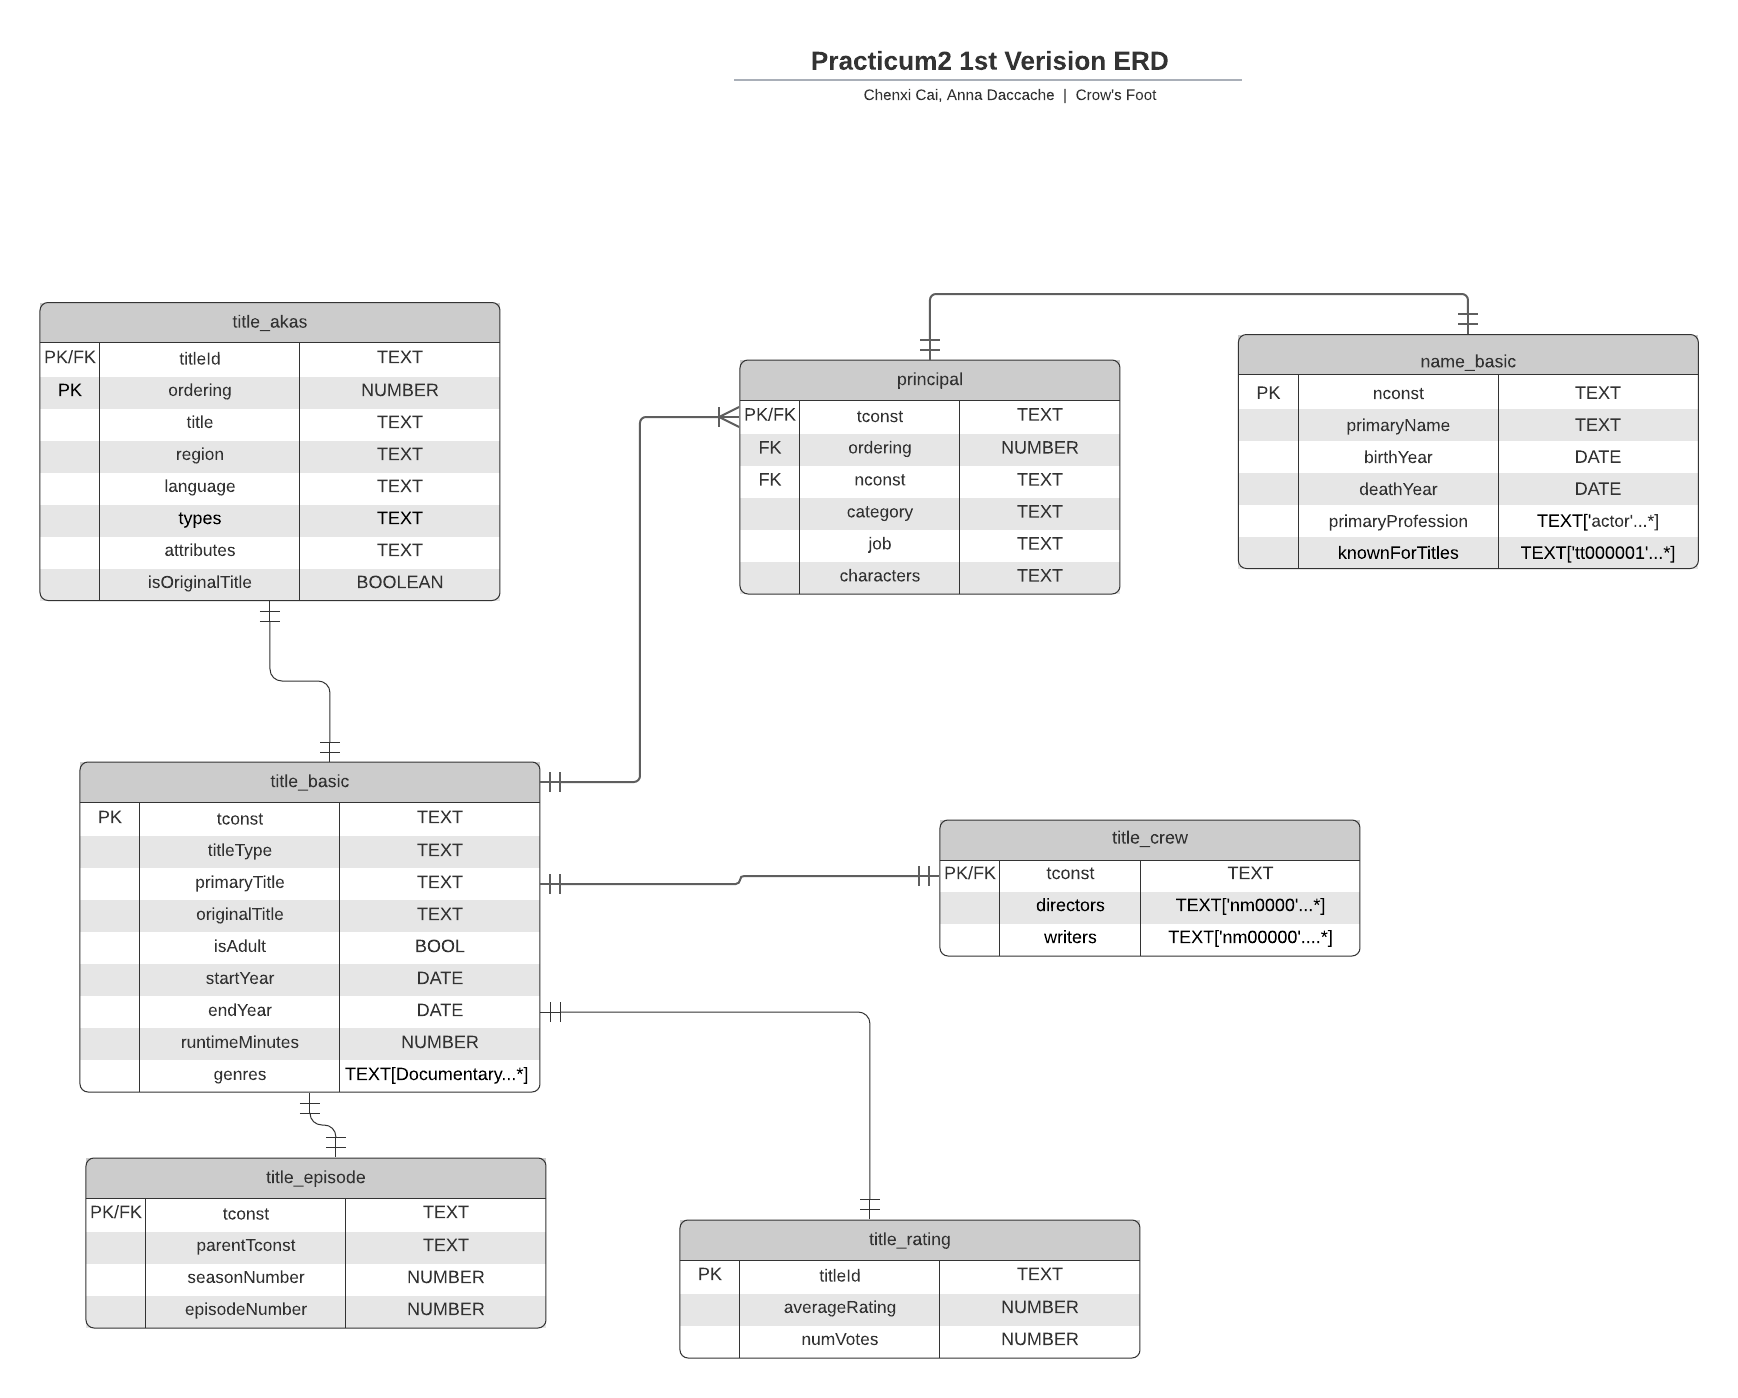

In [4]:
from IPython.display import Image
# Image of first ERD
Image(filename = "/Users/chenxicai/Desktop/cs5200/Assignment/pract2/Practicum/Practicum2.png", width = 1200, height = 1200)

### Task 2B
1. In title.basic table, the column 'genres' is a multi-valued attributes. We created a junction table called title_genre and the genre table to normalize this atrribute. The junction table contains both the PK from title_basic and genre as FK.
2. The same case to the table name_basic primaryProfession attributes.
3. In name_basic, there is another multi-valued atrribute, knownForTitles. Because it is an array containing tconst, we decided to create a junction table called 'title_name' to connect the name_basic and title_basic table.
4. In titke_crew table, both the directors and writers are multi-valued attributes. Because these two arrays contains nconst, we decided to create junction tables, table_directors and table_writers to connect title_crew and name_basic. Also, because writers and directors are people, we thought there are generalization relationship between name_basic and writers/directors. Therefore, we created the writer and director table and connect the junction table, title_writer and title_director to them.

The updated ERD is shown below

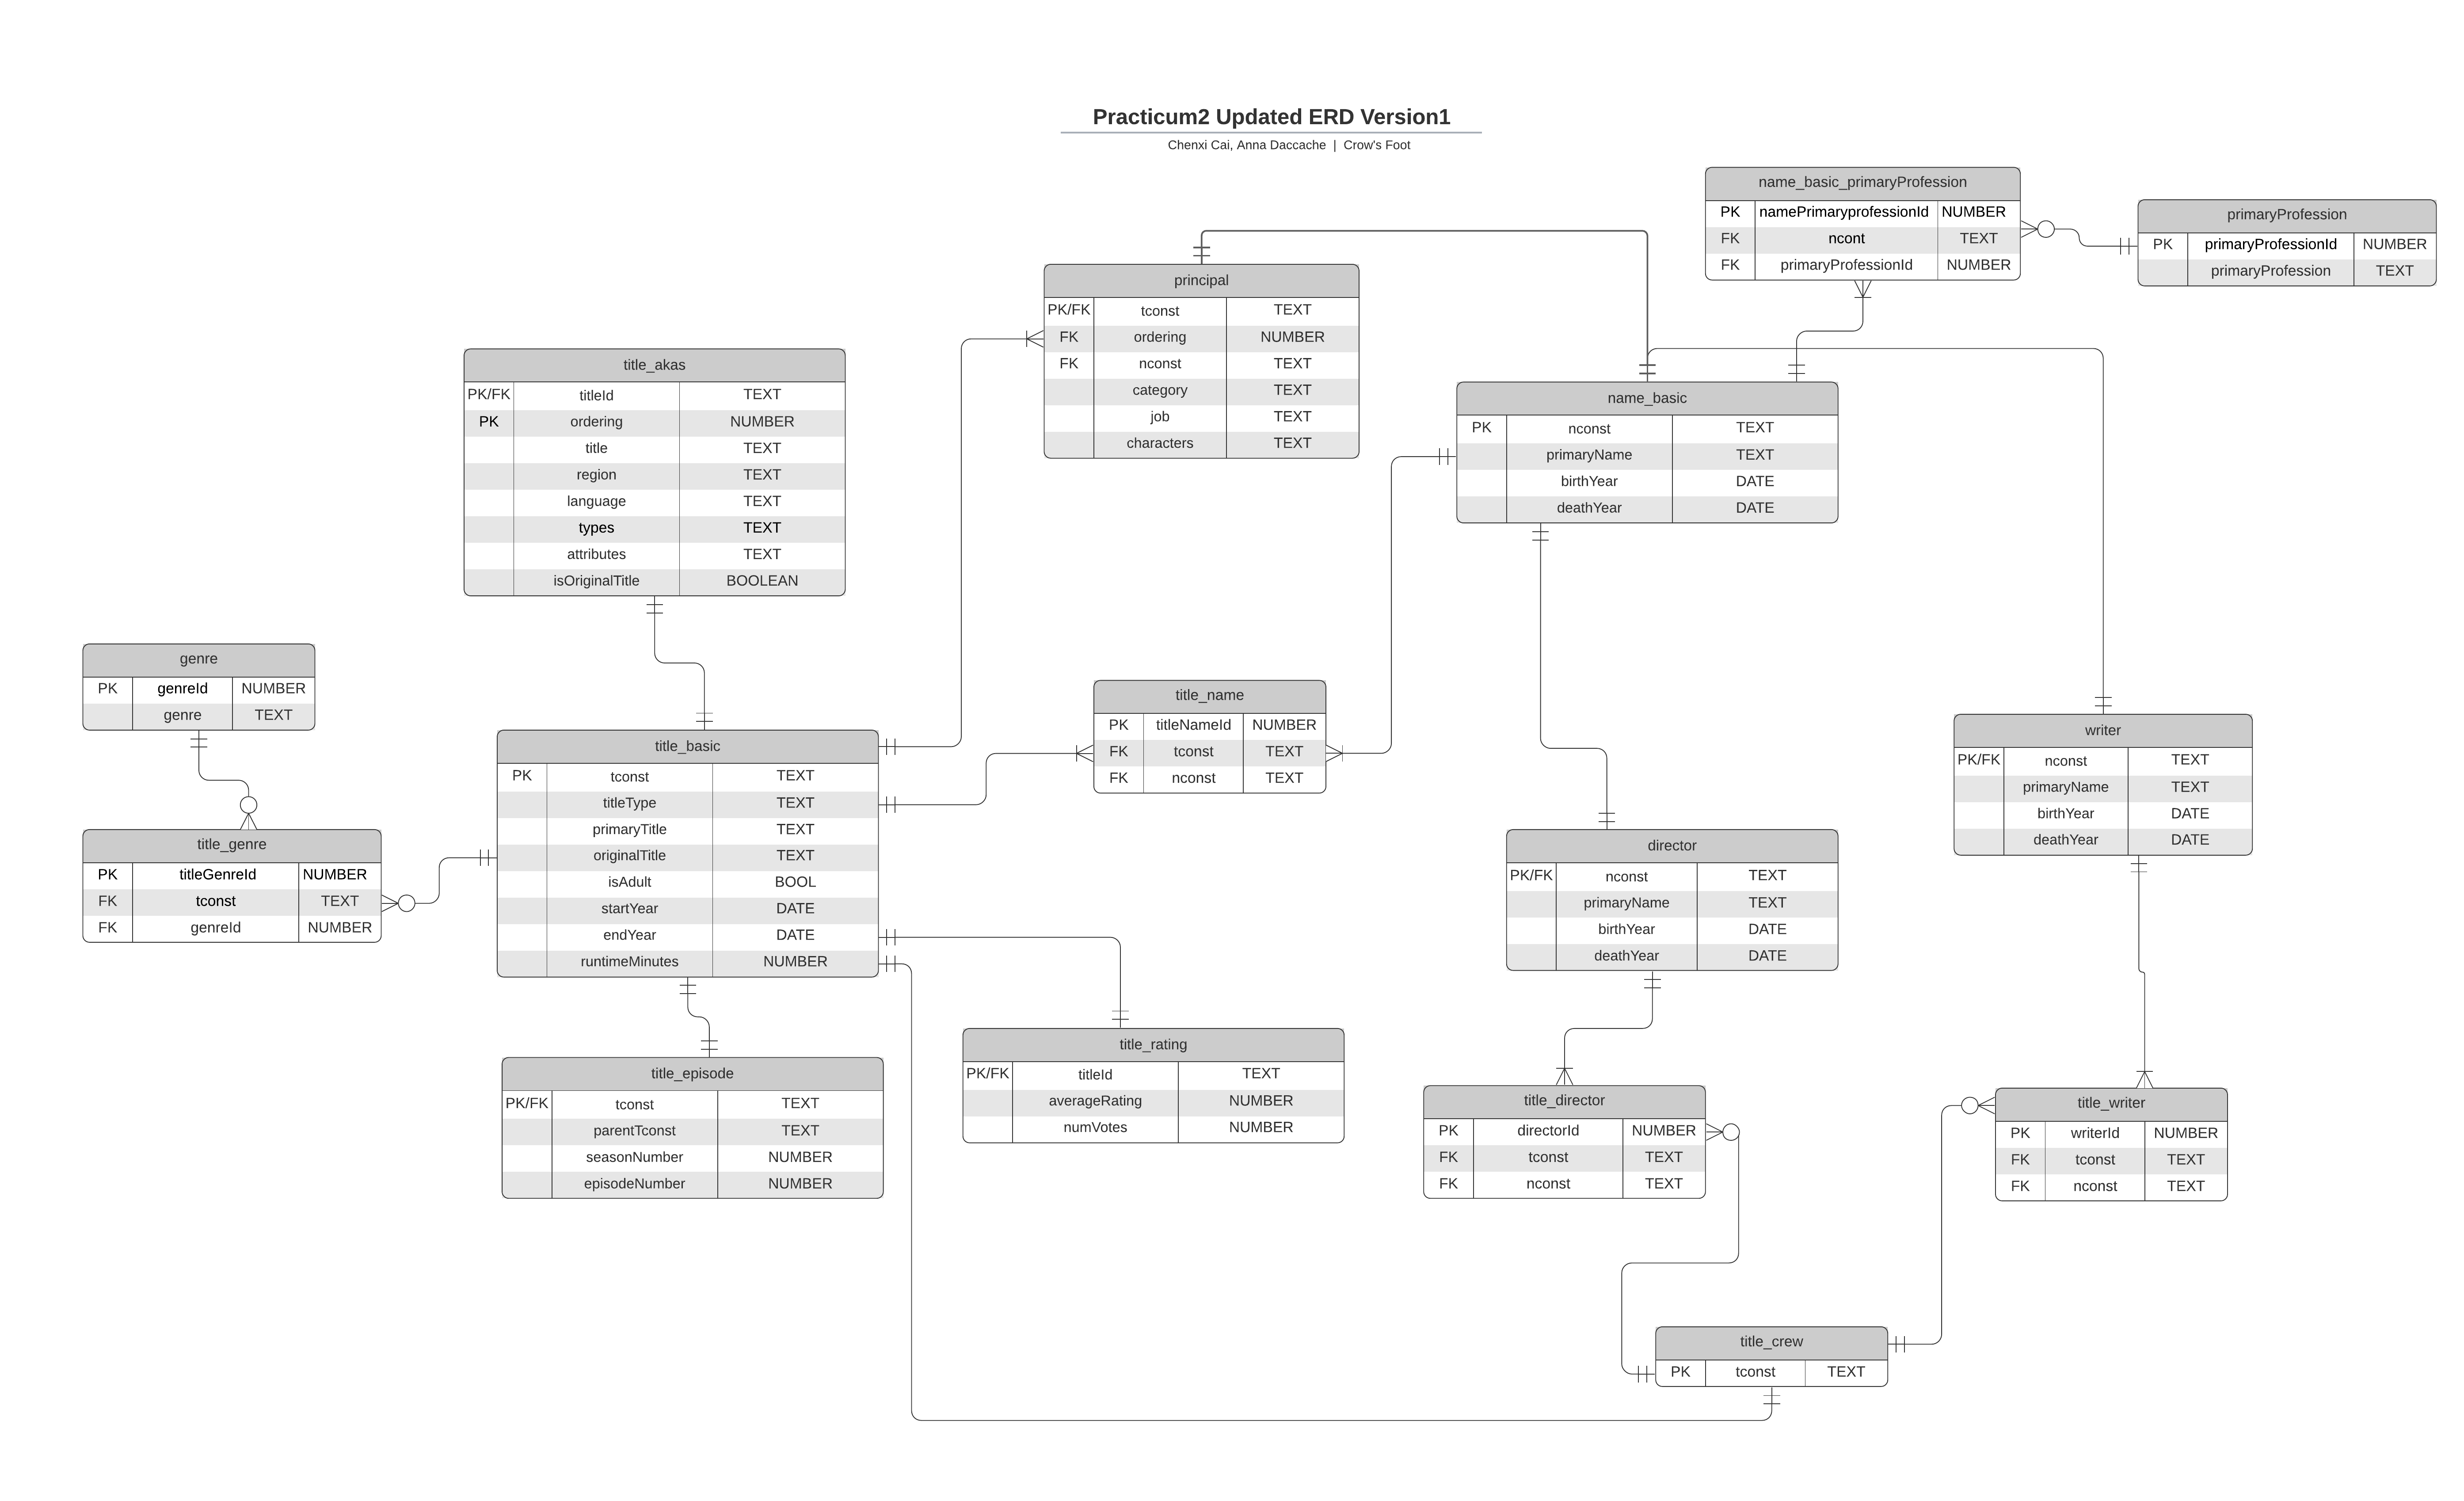

In [6]:
# Image of second ERD
Image(filename = "/Users/chenxicai/Desktop/cs5200/Assignment/pract2/Practicum/Practicum2_update.png", width = 1200, height = 1200)

### Task 3C
We decided to add the two new columns into the name_basic table. Because the age and number of movies the person appeared in are information about people. The updated ERD is shown below.

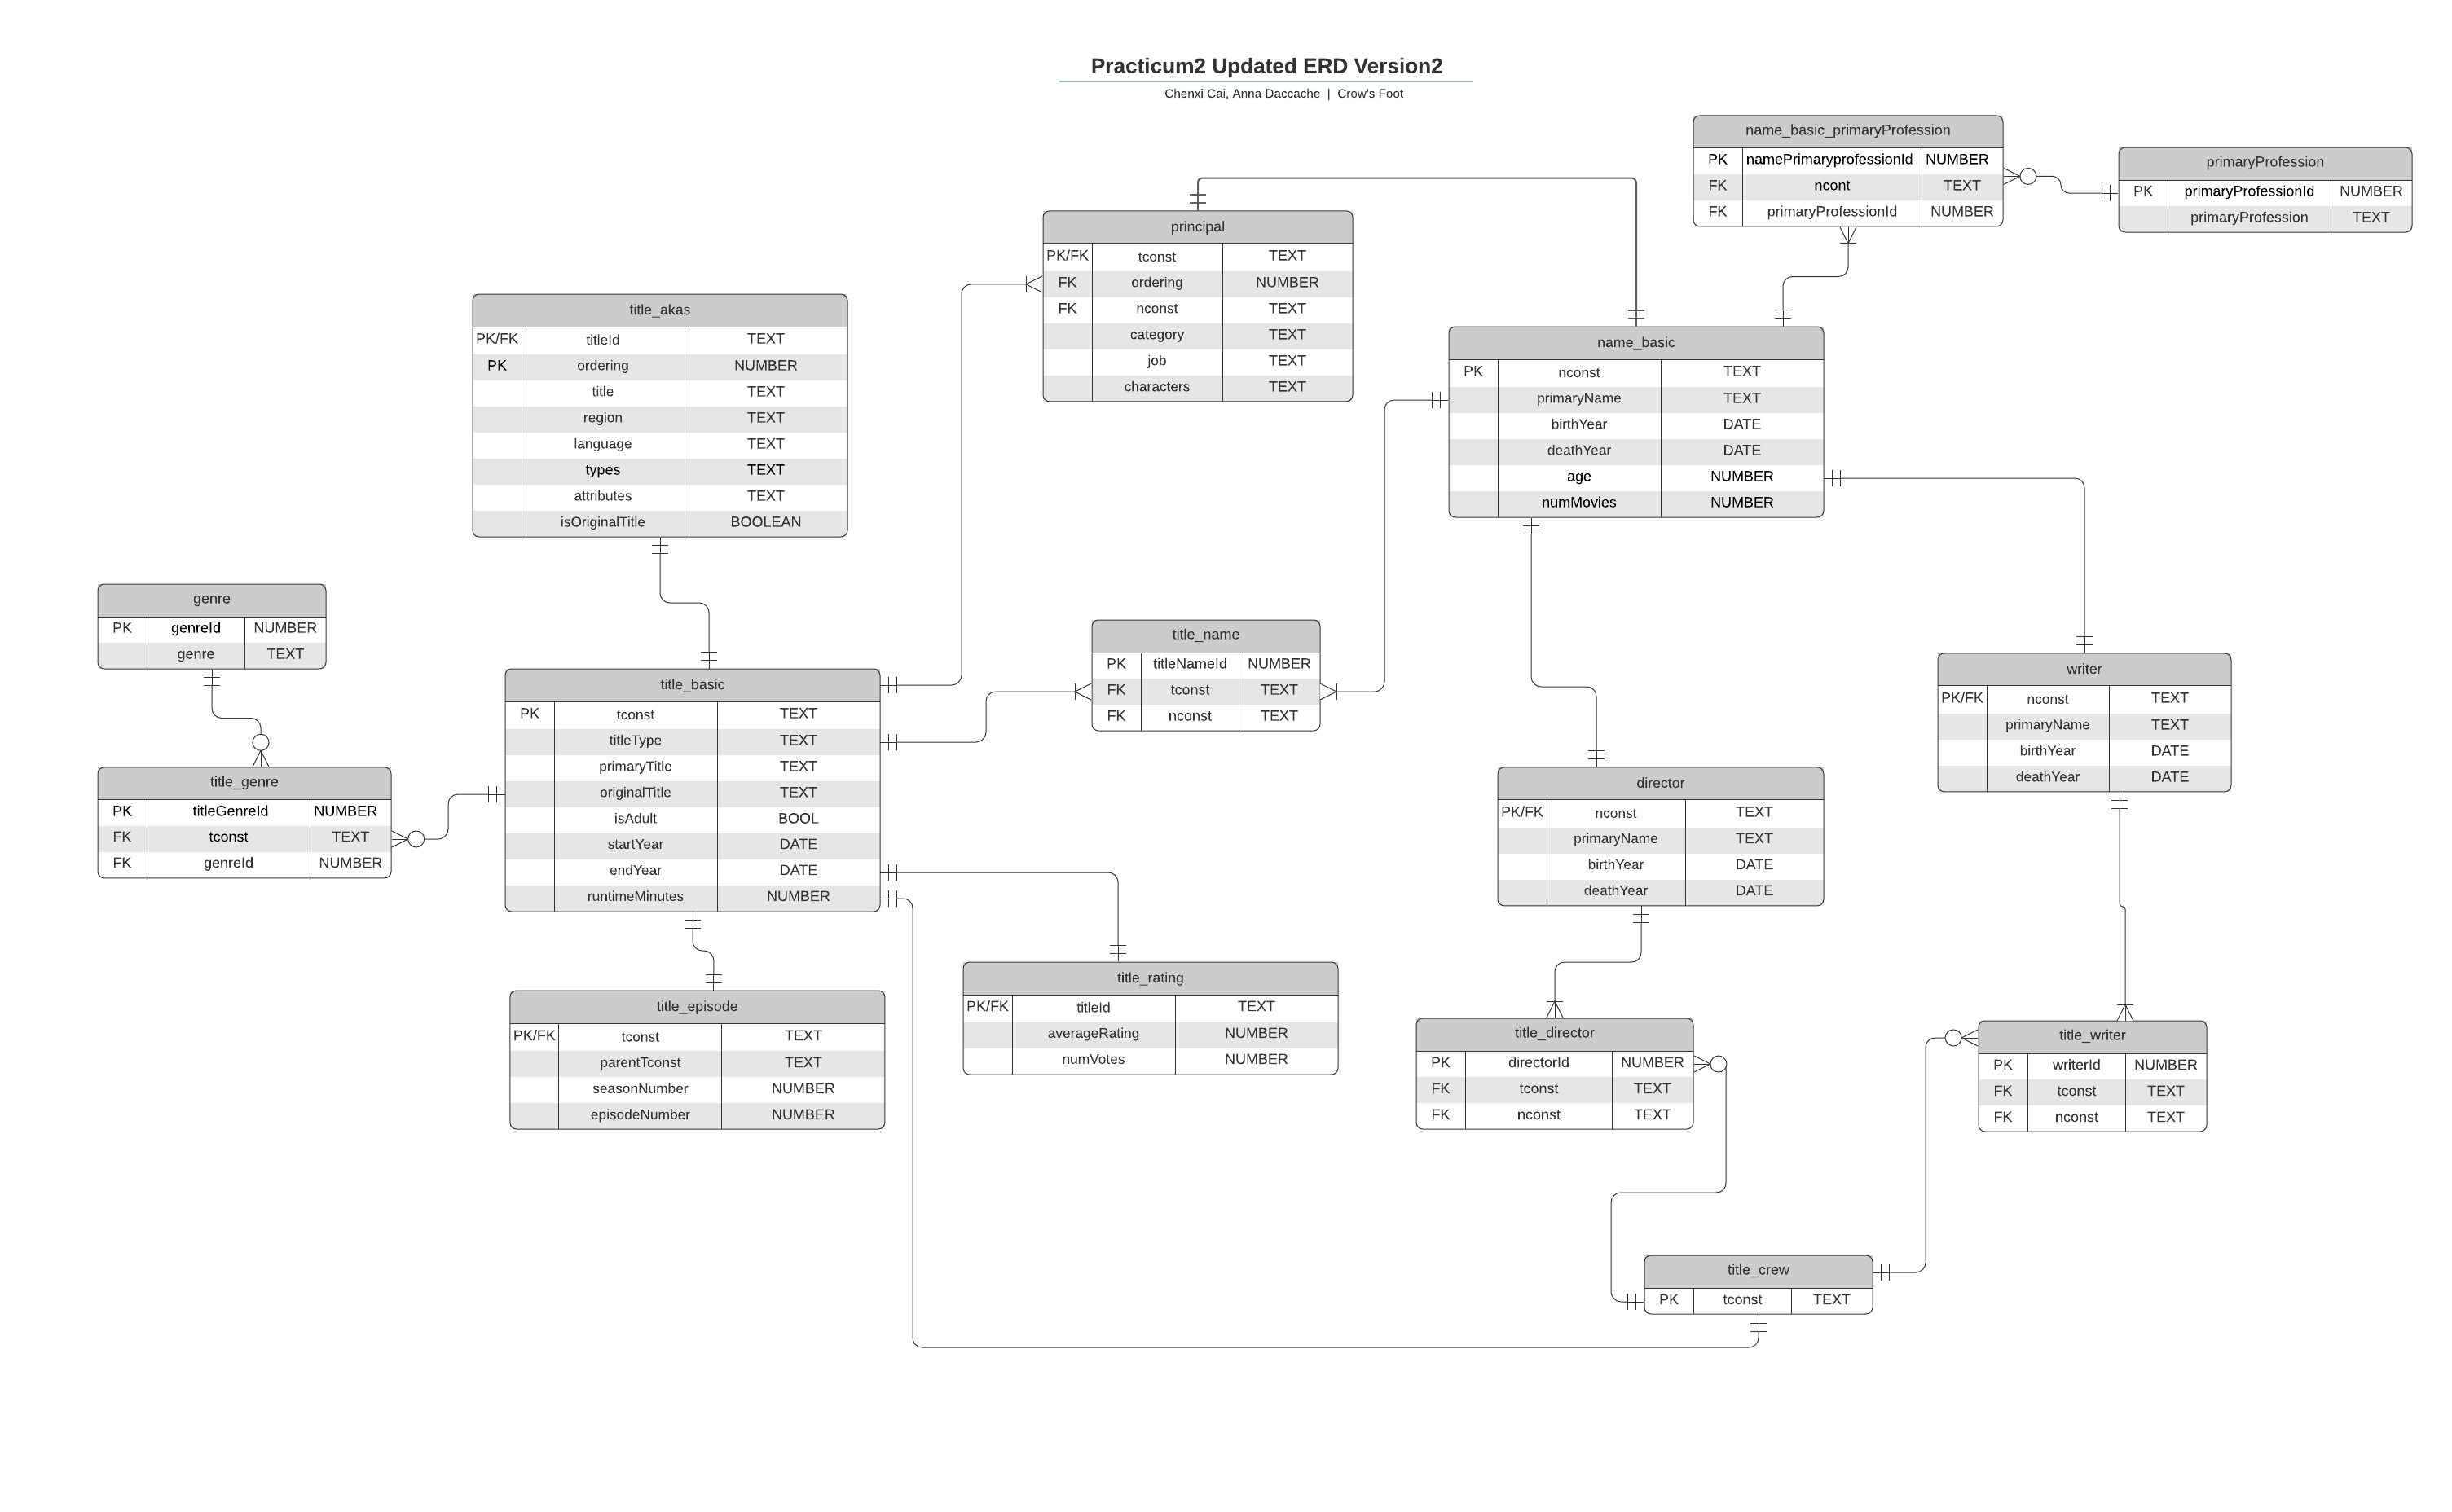

In [8]:
# Image of thrid ERD
Image(filename = "/Users/chenxicai/Desktop/cs5200/Assignment/pract2/Practicum/prac2.2.png", width = 1200, height = 1200)

## Task 3
We use the cursor to connect with local mysql.
Create the database 'IMDb' and all the tables shown in the ERD above.
All the foreign key constraints are considered.

TO TA: Before run this cell, please install pymysql package first, and then change the host, port, user, password to your local value.

In [94]:
import os
import pymysql # please install pymysql by running 'pip install PyMySQL'
import pandas as pd
from sqlalchemy import create_engine

# host = os.getenv('MYSQL_HOST')
host = 'localhost'
port = 3306
user = 'root'
password = 'password' # please change to your root password

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    charset='utf8mb4')
cursor = conn.cursor()

In [95]:
# create the database IMDb
cursor.execute('DROP SCHEMA IF EXISTS `IMDb`')
cursor.execute('CREATE SCHEMA IF NOT EXISTS `IMDb`');
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db='IMDb', user=user, pw=password))
# connect to the IMDb database
mydb = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db='IMDb',
    charset='utf8mb4')

# Create tables
cursor = mydb.cursor()
# name_basic table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`name_basic`')
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`name_basic`(
  `nconst` VARCHAR(45) NOT NULL,
  `primaryName` VARCHAR(45) NULL DEFAULT NULL,
  `birthYear` SMALLINT NULL DEFAULT NULL,
  `deathYear` SMALLINT NULL DEFAULT NULL,
  `age` INT NULL DEFAULT NULL,
  `numMovies` INT NULL DEFAULT NULL,
  PRIMARY KEY (`nconst`))
""")

# director table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`director`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`director` (
  `nconst` VARCHAR(45) NOT NULL,
  `primaryName` VARCHAR(200) NULL DEFAULT NULL,
  `birthYear` SMALLINT NULL DEFAULT NULL,
  `deathYear` SMALLINT NULL DEFAULT NULL,
  PRIMARY KEY (`nconst`),
  CONSTRAINT `name_d_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`name_basic` (`nconst`)
    ON DELETE CASCADE)
""")

# genre table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`genre`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`genre` (
  `genreId` INT NOT NULL,
  `genre` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`genreId`))
""")

# primaryProfession table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`primaryProfession`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`primaryProfession` (
  `primaryProfessionId` INT NOT NULL,
  `primaryProfession` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`primaryProfessionId`))
""")

# name_basic_primaryProfession table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`name_basic_primaryProfession`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`name_basic_primaryProfession` (
  `namePrimaryProfessionId` INT NOT NULL,
  `nconst` VARCHAR(45) NULL DEFAULT NULL,
  `primaryProfessionId` INT NULL DEFAULT NULL,
  PRIMARY KEY (`namePrimaryProfessionId`),
  CONSTRAINT `name_pri_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`name_basic` (`nconst`)
    ON DELETE CASCADE,
  CONSTRAINT `pri_pk`
    FOREIGN KEY (`primaryProfessionId`)
    REFERENCES `IMDb`.`primaryProfession` (`primaryProfessionId`)
    ON DELETE CASCADE)
""")

# title_basic table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_basic`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_basic` (
  `tconst` VARCHAR(45) NOT NULL,
  `titleType` VARCHAR(45) NULL DEFAULT NULL,
  `primaryTitle` VARCHAR(200) NULL DEFAULT NULL,
  `originalTitle` VARCHAR(200) NULL DEFAULT NULL,
  `isAdult` TINYINT NULL DEFAULT NULL,
  `startYear` SMALLINT NULL DEFAULT NULL,
  `endYear` SMALLINT NULL DEFAULT NULL,
  `runTimeMinutes` INT NULL DEFAULT NULL,
  PRIMARY KEY (`tconst`))
""")

# principal table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`principal`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`principal` (
  `tconst` VARCHAR(45) NOT NULL,
  `ordering` INT NOT NULL,
  `nconst` VARCHAR(45) NULL DEFAULT NULL,
  `category` VARCHAR(200) NULL DEFAULT NULL,
  `job` VARCHAR(200) NULL DEFAULT NULL,
  `characters` VARCHAR(200) NULL DEFAULT NULL,
  PRIMARY KEY (`tconst`, `ordering`),
  CONSTRAINT `principal_name_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`name_basic` (`nconst`)
    ON DELETE CASCADE,
  CONSTRAINT `title_principal_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# title_akas table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_akas`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_akas` (
  `titleId` VARCHAR(45) NOT NULL,
  `ordering` INT NOT NULL,
  `title` VARCHAR(200) NULL DEFAULT NULL,
  `region` VARCHAR(45) NULL DEFAULT NULL,
  `language` VARCHAR(45) NULL DEFAULT NULL,
  `types` VARCHAR(200) NULL DEFAULT NULL,
  `attributes` VARCHAR(200) NULL DEFAULT NULL,
  `isOriginalTitle` TINYINT NULL DEFAULT NULL,
  PRIMARY KEY (`titleId`, `ordering`),
  CONSTRAINT `akas_pk`
    FOREIGN KEY (`titleId`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# title_crew table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_crew`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_crew` (
  `tconst` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`tconst`),
  CONSTRAINT `title_basic_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# title_director table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_director`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_director` (
  `directorId` INT NOT NULL,
  `tconst` VARCHAR(45) NULL DEFAULT NULL,
  `nconst` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`directorId`),
  CONSTRAINT `director_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`director` (`nconst`)
    ON DELETE CASCADE,
  CONSTRAINT `title_director_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_crew` (`tconst`)
    ON DELETE CASCADE)
""")

# title_episode table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_episode`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_episode` (
  `tconst` VARCHAR(45) NOT NULL,
  `parentTconst` VARCHAR(45) NULL DEFAULT NULL,
  `seasonNumber` INT NULL DEFAULT NULL,
  `episodeNumber` INT NULL DEFAULT NULL,
  PRIMARY KEY (`tconst`),
  CONSTRAINT `episode_basic_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# title_genre table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_genre`');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_genre` (
  `titleGenreId` INT NOT NULL,
  `tconst` VARCHAR(45) NULL DEFAULT NULL,
  `genreId` INT NULL DEFAULT NULL,
  PRIMARY KEY (`titleGenreId`),
  CONSTRAINT `genre_pk`
    FOREIGN KEY (`genreId`)
    REFERENCES `IMDb`.`genre` (`genreId`)
    ON DELETE CASCADE,
  CONSTRAINT `title_genre_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# title_name table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_name` ;');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_name` (
  `titleNameId` INT NOT NULL,
  `tconst` VARCHAR(45) NULL DEFAULT NULL,
  `nconst` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`titleNameId`),
  CONSTRAINT `basic_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE,
  CONSTRAINT `name_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`name_basic` (`nconst`)
    ON DELETE CASCADE)
""")

# title_rating table
cursor.execute('DROP TABLE IF EXISTS `title`.`title_rating`;');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_rating` (
  `tconst` VARCHAR(45) NOT NULL,
  `averageRating` DOUBLE NULL DEFAULT NULL,
  `numVotes` INT NULL DEFAULT NULL,
  PRIMARY KEY (`tconst`),
  CONSTRAINT `basic_rating_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_basic` (`tconst`)
    ON DELETE CASCADE)
""")

# writer table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`writer`;');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`writer` (
  `nconst` VARCHAR(45) NOT NULL,
  `primaryName` VARCHAR(45) NULL DEFAULT NULL,
  `birthYear` SMALLINT NULL DEFAULT NULL,
  `endYear` SMALLINT NULL DEFAULT NULL,
  PRIMARY KEY (`nconst`),
  CONSTRAINT `name_w_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`name_basic` (`nconst`)
    ON DELETE CASCADE)
""")

# title_writer table
cursor.execute('DROP TABLE IF EXISTS `IMDb`.`title_writer`;');
cursor.execute("""
CREATE TABLE IF NOT EXISTS `IMDb`.`title_writer` (
  `writerId` INT NOT NULL,
  `tconst` VARCHAR(45) NULL DEFAULT NULL,
  `nconst` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`writerId`),
  CONSTRAINT `title_writer_pk`
    FOREIGN KEY (`tconst`)
    REFERENCES `IMDb`.`title_crew` (`tconst`)
    ON DELETE CASCADE,
  CONSTRAINT `writer_pk`
    FOREIGN KEY (`nconst`)
    REFERENCES `IMDb`.`writer` (`nconst`)
    ON DELETE CASCADE)
""")

0

## Task 4
We wrote a scrpt in python to load part of the data except title.crew and title.akas(because we didn't use them in later tasks). The loaded data is parsed according to the ERD we designed and stored in differecnt dataframes. In this script, we keep the referential integrity by checking foreign keys one by one and all the final data meets this requirement. 
### Q: What is the effect of the referential integrity checking while you load? Can you do something about that? 
#### Strategy 1:
When we load the data, we need to consider if all the foreign keys are in the associated table. For example, in the title.episode table, the primary key 'tconst' doesn't start from 'tt0000001', but starts from 'tt0041951'. However, other title.xxx like title.basic starts from 'tt0000001'. In our design, the title.basic is the main table and other title.xxx tables have foreign keys 'tconst'. To check the referential integrity, we need to load the title.episode first and then load the title.basic. After get the original data of title.basic, we need to check the tconst in title.basic one by one and keep as many tconst which in title.episode as possible. After it, we need to check the tconst in title.episode again and remove the value that is not in title.basic. 
By doing this three steps:
1. load the data of table (T1) that has the foriegn key.
2. load the data of table that the foreign key reference to (T2). Check the foreign key values in this table to keep as many values that also in T1 as possible.
3. Check the foreign key values in T1 again and remove the values that are not in T2.

We can keep the referential integrity.

Also, in order to have more data, we set an instance called EXTRA_ROWS and set it to 500. This value is used in title.basic and name.basic which are the two main tables to load more rows after all the foreign key checking.

#### Strategy 2:
When normalizing many-many relationships and multi-value attributes, we did the following steps:
1. create an empty junction table(T1)
2. As for many-many relationships, we insert the two primary keys from the two original tables into this new empty junction table as foreign keys and create new increasing primairy keys with int format for them.
3. As for multi-value attributes, we create another table(T2) that contains all the types of this attribute, for example, in the genre table, there are different type of genre like action, etc. Then for every row of the original table(T3) that has the multi-value attributes, we get all the values of this multi-valued attributes, check these values one by one to see if it is in T2. If it is, then get the corrosponding primary key of this value in T2 and the primary key of T3 and put them as foreign keys in the junction table T1. We also need to create a primary key for this record in T3. If not, first create a new record (primary key, value) in T2 and then do the same thing to insert a new record in T1. 

We used the dictionary (hashmap) in python to do this operations. The dictionary is to keep the value and corrosponding position in T2.
 
The python script is shown below. To run this script, please set the datafiles that are downloaded from IMDb as:
titleepisode, titlebasic, titlerating, namebasic, titleprincipal
and put them in the same folder of this notebook.

It will take some time for running this script.

In [46]:
import pandas as pd
import numpy as np

EXTRA_ROWS = 500

def changeNULLValue(dataframeName):
    for i,row in dataframeName.iterrows():
        for j in range(len(row)):
            if row[j] == '\\N':
                row[j] = None

# read title.episode, get the the first 80 rows
# we first read data from title.episode because the tconst in this table is very large
# and need to be consider first to save more time
title_episode_df = pd.read_csv('titleepisode.tsv', sep='\t', header=0, nrows=100)
# get all the primary key of title.episode
episode_title_set = set(title_episode_df['tconst'].tolist())

# read title.basic data
title_basic_df_whole = pd.read_csv('titlebasic.tsv', sep='\t', header=0, nrows=60000)
title_basic_df = pd.DataFrame(columns=title_basic_df_whole.columns.tolist())

# build the joint table for title basic and genres
title_genres_df = pd.DataFrame(columns=['titleGenreId', 'tconst', 'genreId'])
# build the genres table
genres_df = pd.DataFrame(columns=['genreId', 'genre'])
# create set for genre
genreMap = {}

count = 0
i = j = 1
for index, row in title_basic_df_whole.iterrows():
    # foreign integrity
    if row['tconst'] in episode_title_set:
        title_basic_df = title_basic_df.append(row)
    # more rows
    elif count < EXTRA_ROWS:
        title_basic_df = title_basic_df.append(row)
        count += 1

# add genres attributes
for index, row in title_basic_df.iterrows():
    genres_list = row['genres'].split(',') if row['genres'] else []
    for genre in genres_list:
        if genre != '\\N':
            if genre not in genreMap:
                genreMap[genre] = i
                genres_df = genres_df.append({'genreId': i, 'genre': genre}, ignore_index=True)
                i += 1
            title_genres_df = title_genres_df.append({'titleGenreId': j, 'tconst': row['tconst'], 'genreId': genreMap[genre]}, ignore_index=True)
            j += 1
title_basic_df = title_basic_df.drop(columns='genres')
basic_title_set = set(title_basic_df['tconst'].tolist())

# read title.rating
title_rating_df_whole = pd.read_csv('titlerating.tsv', sep='\t', header=0, nrows=50000)
title_rating_df = pd.DataFrame(columns=title_rating_df_whole.columns)

count = 0
for index, row in title_rating_df_whole.iterrows():
    if row['tconst'] in basic_title_set:
        title_rating_df = title_rating_df.append(row)


# do adjustment of title_episode table to satisified foreign integrity(FK in episode, PPK in basic).
# some FK in episode may not have corrosponding PK basic
title_episode_df_sub = pd.DataFrame(columns=title_episode_df.columns)
for index, row in title_episode_df.iterrows():
    if row['tconst'] in basic_title_set:
        title_episode_df_sub = title_episode_df_sub.append(row)
episode_title_set = set(title_episode_df_sub['tconst'].tolist())

# read name_basic data
name_df_whole = pd.read_csv('namebasic.tsv', sep='\t', header=0, nrows=200000)
name_df = pd.DataFrame(columns=name_df_whole.columns.tolist()[:-1])
title_name_table = pd.DataFrame(columns=['titleNameId', 'tconst', 'nconst']) # join table

index_known = count = 1
for index, row in name_df_whole.iterrows():
    # get the titles
    known_for_titles_list = row['knownForTitles'].split(",") if row['knownForTitles'] else []
    for title in known_for_titles_list:
        if title in basic_title_set:
            # assign titleId in to KnownForTitles filed in order to match the foreign key.
            if row['nconst'] not in set(name_df['nconst'].tolist()):
                name_df = name_df.append(row[:-1])
            # add data to join table
            title_name_table = title_name_table.append({'titleNameId': index_known, 'tconst': title, 'nconst': row['nconst']}, ignore_index=True)
            index_known += 1
    if count < EXTRA_ROWS and row['nconst'] not in set(name_df['nconst'].tolist()):
        name_df = name_df.append(row[:-1])
        count += 1


# read title_principal data
title_principal_df_whole = pd.read_csv('titleprincipal.tsv', sep='\t', header=0, nrows=10000, low_memory=False)
title_principal_df = pd.DataFrame(columns=title_principal_df_whole.columns)

for index, row in title_principal_df_whole.iterrows():
    # foreign key in principal is the primary key of basic
    if row['tconst'] in basic_title_set:
        title_principal_df = title_principal_df.append(row)
principal_key_set = set(title_principal_df['nconst'].tolist()) 

# add more rows to name.basics table
# read namebasic
name_df_sub = pd.read_csv('namebasic.tsv', sep='\t', header=0, nrows=200000)

for index, row in name_df_sub.iterrows():
    if row['nconst'] not in set(name_df['nconst'].tolist()) and row['nconst'] in principal_key_set:
        name_df = name_df.append(row[:-1])

# add primaryProfession attributes
# build the joint table for title name_basic and primaryProfession Attribute
name_primaryprofession_table = pd.DataFrame(columns=['namePrimaryProfessionId', 'nconst', 'primaryProfessionId'])
# build the primaryProfession table
primaryprofession_table = pd.DataFrame(columns=['primaryProfessionId', 'primaryProfession'])
# create set for primaryProfession
primary_profession_map = {}
index_profession_join = index_profession = 1

for index, row in name_df.iterrows():
    primary_profession_list = row['primaryProfession'].split(',') if type(row['primaryProfession']) == str else []
    for primary_profession in primary_profession_list:
        if primary_profession != '\\N':
            if primary_profession not in primary_profession_map:
                primary_profession_map[primary_profession] = index_profession
                primaryprofession_table = primaryprofession_table.append({'primaryProfessionId': index_profession , 'primaryProfession': primary_profession}, ignore_index=True )
                index_profession += 1
            name_primaryprofession_table = name_primaryprofession_table.append({'namePrimaryProfessionId': index_profession_join, 'nconst':row['nconst'], 'primaryProfessionId': primary_profession_map[primary_profession]}, ignore_index=True )
            index_profession_join += 1
name_df = name_df.drop(columns=['primaryProfession'])
name_df['age'] = None
name_df['numMovies'] = None

# update principal table
title_principal_table = pd.DataFrame(columns=title_principal_df.columns)
for index, row in title_principal_df.iterrows():
    if row['nconst'] in set(name_df['nconst'].tolist()):
        title_principal_table = title_principal_table.append(row)

changeNULLValue(title_basic_df)
changeNULLValue(genres_df)
changeNULLValue(title_genres_df)
changeNULLValue(title_rating_df)
changeNULLValue(title_episode_df_sub)
changeNULLValue(title_name_table)
changeNULLValue(name_df)
changeNULLValue(name_primaryprofession_table)
changeNULLValue(primaryprofession_table)
changeNULLValue(title_principal_table)


Sometimes the cell below takes a long time or some data aren't loaded into table. If that happens,
please run the task 3 again to connect mysql server again and then run the cell below.

In [96]:
# Convert dataframe to sql table
def loadData(tableName, dataframeName):
    dataframeName.to_sql(tableName, engine, index=False, if_exists='append')

loadData('title_basic', title_basic_df)
loadData('title_rating', title_rating_df)
loadData('title_episode', title_episode_df_sub)
loadData('genre', genres_df)
loadData('title_genre', title_genres_df)
loadData('name_basic', name_df)
loadData('title_name', title_name_table)
loadData('principal', title_principal_table)
loadData('primaryProfession', primaryprofession_table)
loadData('name_basic_primaryProfession', name_primaryprofession_table)


##### Then all the data is loaded into table, we show the top 10 rows of all the tables below. 

In [ ]:
# show the tables
# title_basic
df = pd.read_sql_query("SELECT * FROM title_basic",mydb)
df.head(10)

In [98]:
# title_rating
df = pd.read_sql_query("SELECT * FROM title_rating", mydb)
df.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.6,1656
1,tt0000002,6.1,201
2,tt0000003,6.5,1368
3,tt0000004,6.2,122
4,tt0000005,6.2,2151
5,tt0000006,5.3,115
6,tt0000007,5.4,661
7,tt0000008,5.4,1820
8,tt0000009,5.9,155
9,tt0000010,6.9,6074


In [99]:
# title_episode
df = pd.read_sql_query("SELECT * FROM title_episode", mydb)
df.head(10)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1.0,9.0
1,tt0042816,tt0989125,1.0,17.0
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3.0,42.0
4,tt0043631,tt0989125,2.0,16.0
5,tt0043693,tt0989125,2.0,8.0
6,tt0043710,tt0989125,3.0,3.0
7,tt0044093,tt0959862,1.0,6.0
8,tt0044668,tt0044243,2.0,16.0
9,tt0044901,tt0989125,3.0,46.0


In [100]:
# genre
df = pd.read_sql_query("SELECT * FROM genre", mydb)
df.head(10)

,genreId,genre
0,1,Documentary
1,2,Short
2,3,Animation
3,4,Comedy
4,5,Romance
5,6,Sport
6,7,Horror
7,8,Drama
8,9,Fantasy
9,10,Biography


In [101]:
# title_genrere
df = pd.read_sql_query("SELECT * FROM title_genre", mydb)
df.head(10)

,titleGenreId,tconst,genreId
0,1,tt0000001,1
1,2,tt0000001,2
2,3,tt0000002,3
3,4,tt0000002,2
4,5,tt0000003,3
5,6,tt0000003,4
6,7,tt0000003,5
7,8,tt0000004,3
8,9,tt0000004,2
9,10,tt0000005,4


In [103]:
# name_basic
df = pd.read_sql_query("SELECT * FROM name_basic", mydb)
df.head(10)

,nconst,primaryName,birthYear,deathYear,age,numMovies
0,nm0000001,Fred Astaire,1899.0,1987.0,None,None
1,nm0000002,Lauren Bacall,1924.0,2014.0,None,None
2,nm0000003,Brigitte Bardot,1934.0,NaN,None,None
3,nm0000004,John Belushi,1949.0,1982.0,None,None
4,nm0000005,Ingmar Bergman,1918.0,2007.0,None,None
5,nm0000006,Ingrid Bergman,1915.0,1982.0,None,None
6,nm0000007,Humphrey Bogart,1899.0,1957.0,None,None
7,nm0000008,Marlon Brando,1924.0,2004.0,None,None
8,nm0000009,Richard Burton,1925.0,1984.0,None,None
9,nm0000010,James Cagney,1899.0,1986.0,None,None


The 'age' and 'numMovies' are created with empty values.

In [104]:
# title_name
df = pd.read_sql_query("SELECT * FROM title_name", mydb)
df.head(10)

,titleNameId,tconst,nconst
0,1,tt0000247,nm0002504
1,2,tt0000472,nm0002615
2,3,tt0000514,nm0016071
3,4,tt0000541,nm0023121
4,5,tt0000165,nm0024876
5,6,tt0000417,nm0029244
6,7,tt0000376,nm0051042
7,8,tt0000009,nm0063086
8,9,tt0000511,nm0065393
9,10,tt0000486,nm0069325


In [105]:
# principal
df = pd.read_sql_query("SELECT * FROM principal", mydb)
df.head(10)
# The characters isn't a multi-valued attributes, so we use TEXT format

,tconst,ordering,nconst,category,job,characters
0,tt0000001,2,nm0005690,director,None,None
1,tt0000005,3,nm0005690,director,None,None
2,tt0000006,1,nm0005690,director,None,None
3,tt0000007,1,nm0179163,actor,None,None
4,tt0000007,2,nm0183947,actor,None,None
5,tt0000007,3,nm0005690,director,None,None
6,tt0000008,2,nm0005690,director,None,None
7,tt0000009,1,nm0063086,actress,None,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
8,tt0000009,2,nm0183823,actor,None,"[""Mr. Hamilton""]"
9,tt0000009,4,nm0085156,director,None,None


In [106]:
# primaryProfession
df = pd.read_sql_query("SELECT * FROM primaryProfession", mydb)
df.head(10)

,primaryProfessionId,primaryProfession
0,1,soundtrack
1,2,actor
2,3,miscellaneous
3,4,actress
4,5,music_department
5,6,writer
6,7,director
7,8,producer
8,9,make_up_department
9,10,composer


In [107]:
# name_basic_primaryProfession
df = pd.read_sql_query("SELECT * FROM name_basic_primaryProfession", mydb)
df.head(10)

,namePrimaryProfessionId,nconst,primaryProfessionId
0,1,nm0000001,1
1,2,nm0000001,2
2,3,nm0000001,3
3,4,nm0000002,4
4,5,nm0000002,1
5,6,nm0000003,4
6,7,nm0000003,1
7,8,nm0000003,5
8,9,nm0000004,2
9,10,nm0000004,1


### Task 5 UPDATE statements
1. age of a person: We calculated the age by doing deadthYear - birthYear in the name_basic table. 
   1. If the person are still alive (death year is NULL), the age is 2020 - birthYear.
   2. If the birthYear is NULL, then the age is also NULL
2. The number of movies a person has appeared in: We consider this value as the number of movies that the person worked as a principal. Therefore, we left join the name_basic with principal and title_basic and then filter with 'movie' title type. Then all the rows in name_basic will have calculated values. If the number of movies is 0, set value to 0

We show the tail 10 rows because the 'numMovies' of top 10 rows are all 0 and are not good to be shown as example.

In [112]:
cursor.execute("SET SQL_SAFE_UPDATES = 0")
update_age_sql = ("""
UPDATE IMDb.name_basic
SET age = IFNULL(deathYear, 2020) - birthYear
""")
update_numMovies_sql = ("""
UPDATE IMDb.name_basic as NB
LEFT JOIN (SELECT TP.nconst as nameId, COUNT(DISTINCT TP.tconst) as movieCount
 FROM IMDb.name_basic as NAB, IMDb.principal as TP, IMDb.title_basic as TB
 WHERE TP.nconst = NAB.nconst AND TP.tconst = TB.tconst AND TB.titleType = 'movie'
 GROUP BY TP.nconst) AS subTable
ON NB.nconst = subTable.nameId
SET NB.numMovies = IFNULL(subTable.movieCount, 0)
""")
cursor.execute(update_age_sql)
cursor.execute(update_numMovies_sql)
cursor.execute("SET SQL_SAFE_UPDATES = 1")

# updated name_basic
df = pd.read_sql_query("SELECT * FROM name_basic", mydb)
df.tail(10)

,nconst,primaryName,birthYear,deathYear,age,numMovies
557,nm0182052,Manuel Maria da Costa Veiga,NaN,NaN,NaN,0
558,nm0182945,Victor de Cottens,1862.0,1956.0,94.0,0
559,nm0183817,Helen Courtenay,NaN,NaN,NaN,0
560,nm0183823,William Courtenay,1875.0,1933.0,58.0,1
561,nm0183947,Peter Courtney,1867.0,1896.0,29.0,0
562,nm0185426,Ignacio Coyne,NaN,NaN,NaN,0
563,nm0187697,Sam Crewes,NaN,NaN,NaN,0
564,nm0194945,Jehanne d'Alcy,1865.0,1956.0,91.0,0
565,nm0196787,Berthe Dagmar,1884.0,1934.0,50.0,0
566,nm0207305,Jeanne-Marie Leprince de Beaumont,1711.0,1780.0,69.0,0


### Task 6 Trigger to update attributes
As the update statements above shown, we used name_basic and principal tables to calculate the numMovies, and one table to calculate the age. Therefore, we created one trigger for age and numMovies on name_basic table and one trigger for numMovies on principal tables

We didn't use DELIMITER \$\$
because there will be error running in notebook with the 'DELIMITER $$'

1. IMDb.name_basic_BEFORE_INSERT: before insert new record into name_basic, the age and numMovies can be calcaulted first and assigned to the new record.
2. IMDb.principal_AFTER_INSERT: after inserting new record in principal table, the numMovies may be changed because the person may work as principal in more movies.

In [139]:
# first trigger on name_basic to update age and numMovies
cursor.execute("""
-- This trigger is to update the age and numMovies value in 'name_basic' table
-- when values are inserted in to the 'name_basic' table
DROP TRIGGER IF EXISTS IMDb.name_basic_BEFORE_INSERT
""")
cursor.execute("""
CREATE TRIGGER IMDb.name_basic_BEFORE_INSERT
BEFORE INSERT ON IMDb.name_basic
FOR EACH ROW
BEGIN
SET NEW.age = IFNULL(NEW.deathYear, 2020) - NEW.birthYear;
IF NEW.numMovies IS NULL
THEN
    SET NEW.numMovies = IFNULL((SELECT COUNT(DISTINCT TP.nconst) 
        FROM IMDb.principal as TP, IMDb.title_basic as TB
        WHERE TP.nconst = NEW.nconst AND TP.tconst = TB.tconst AND TB.titleType = 'movie'), 0);\n
END IF;\n
END
""")

# second trigger on principal to update numMovies
cursor.execute("""
-- This trigger is to update the age and numMovies value in 'name_basic' table
-- when values are inserted in to the 'principal' table
DROP TRIGGER IF EXISTS IMDb.principal_AFTER_INSERT
""")
cursor.execute("""            
CREATE TRIGGER IMDb.principal_AFTER_INSERT
AFTER INSERT ON IMDb.principal
FOR EACH ROW
BEGIN
UPDATE IMDb.name_basic as NB
SET NB.numMovies = IFNULL((SELECT COUNT(DISTINCT TP.nconst) 
        FROM IMDb.principal as TP, IMDb.title_basic as TB
        WHERE TP.nconst = NB.nconst AND TP.tconst = TB.tconst AND TB.titleType = 'movie'), 0)
WHERE NB.nconst = NEW.nconst; \n
END
""")

0

Then we tested the three triggers.
1. First, we found there isn't a record in name_basic whose nconst is nm0000500

In [131]:
# test three triggers
# before any inserting (no trigger is executed), there is the record whose nconst is nm0000500
df = pd.read_sql_query("SELECT * FROM name_basic WHERE nconst = 'nm0000500'", mydb)
df.head()

,nconst,primaryName,birthYear,deathYear,age,numMovies


We decided to insert this record as a testing.
After inserting, the first trigger IMDb.name_basic_BEFORE_INSERT is executed and the age is calculated. Now the numMovies is 0.

In [135]:
# test trigger IMDb.name_basic_BEFORE_INSERT by inserting the record whose nconst is nm0000500
cursor.execute("""
INSERT INTO IMDb.name_basic (`nconst`, `primaryName`, `birthYear`, `deathYear`, `age`, `numMovies`) VALUES ('nm0000500', 'Richard Linklater ', 1960, NULL, 
NULL, NULL)
""")
df = pd.read_sql_query("SELECT * FROM name_basic WHERE nconst = 'nm0000500'", mydb)
df.head()

,nconst,primaryName,birthYear,deathYear,age,numMovies
0,nm0000500,Richard Linklater,1960,None,60,0


Then in order to test IMDb.principal_AFTER_INSERT, we insert a record whose nconst is nm0000500 and with tconst is 'tt0000009' which is a movie. 

In [136]:
# the title tt0000009 is movie type
df = pd.read_sql_query("SELECT * FROM title_basic WHERE tconst = 'tt0000009'", mydb)
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runTimeMinutes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,None,45


After inserting the record to principal, the numMovies of nm0000500 change from 0 to 1. 
The second trigger runs successfully.

In [138]:
# insert this record in principal
cursor.execute("""
INSERT INTO IMDb.principal (`tconst`, `ordering`, `nconst`, `category`, `job`, `characters`) VALUES ('tt0000009', 3, 'nm0000500', 'actor', NULL, NULL)
""")

# The MDb.principal_AFTER_INSERT is executed and the record whose nconst is nm0000500 is updated to 1.
df = pd.read_sql_query("SELECT * FROM name_basic WHERE nconst = 'nm0000500'", mydb)
df.head()

,nconst,primaryName,birthYear,deathYear,age,numMovies
0,nm0000500,Richard Linklater,1960,None,60,1


### Task 7 View of actor
Create a view that lists the name of each actor or actress, their age, whether they are dead or not, and how many movies they are known for based on what is stored for each actor or actress.

1. We check if the deathYear of the person is NULL or not to see if he/she is dead. If It is NULL, then nre created column 'IsDead' is NO, otherwise, YES.
2. We inner join the name_basic with name_basic_primaryProfession and primaryProfession table to get the person who is an actor or actress and then We left them with title_name and title_basic table and using GROUP BY to calculate how many movies the person is known for.
3. Finally we left join name_basic with the subquery result in point 2 to get the attributes for all rows.

In [145]:
cursor.execute("""
DROP VIEW IF EXISTS IMDb.actorOrActress;
""")
cursor.execute("""
CREATE VIEW IMDb.actorOrActress
AS
SELECT
    NBT.primaryName,
    NBT.age,
    IF(NBT.deathYear IS NULL, 'NO', 'YES') AS IsDead,
    IFNULL(subTable.numKnowMovies, 0) AS numKnowMovies
FROM IMDb.name_basic AS NBT
LEFT JOIN
    (SELECT NB.nconst, count(TB.tconst) AS numKnowMovies
    FROM IMDb.name_basic AS NB
    INNER JOIN IMDb.name_basic_primaryProfession AS NBP
        ON NB.nconst = NBP.nconst
    INNER JOIN IMDb.primaryProfession AS TP
        ON TP.primaryProfessionId = NBP.primaryProfessionId
    LEFT JOIN IMDb.title_name AS TN
        ON NB.nconst = TN.nconst
    LEFT JOIN IMDb.title_basic AS TB
        ON TB.tconst = TN.tconst
    WHERE (TP.primaryProfession = 'actor' OR TP.primaryProfession = 'actress') AND TB.titleType = 'movie'
    GROUP BY NB.nconst) AS subTable
ON subTable.nconst = NBT.nconst
""")

# get the view
df = pd.read_sql_query("SELECT * FROM IMDb.actorOrActress", mydb)
df.head(10)

,primaryName,age,IsDead,numKnowMovies
0,Fred Astaire,88.0,YES,0
1,Lauren Bacall,90.0,YES,0
2,Brigitte Bardot,86.0,NO,0
3,John Belushi,33.0,YES,0
4,Ingmar Bergman,89.0,YES,0
5,Ingrid Bergman,67.0,YES,0
6,Humphrey Bogart,58.0,YES,0
7,Marlon Brando,80.0,YES,0
8,Richard Burton,59.0,YES,0
9,James Cagney,87.0,YES,0


Then we want to test the view again.
1. We inserted the movie whose tconst is tt0000009 and the first person in this view 'Fred Astaire' whose nconst is nm0000001 into title_name.
2. After doing this, we found the numKnowMovies in view of Fred Astaire changes from 0 to 1.

The view is correct

In [148]:
#  test the view by inserting the movie tt0000009 and nm0000001 (Fred Astaire) into title_name table
cursor.execute("""
INSERT INTO IMDb.title_name (`titleNameId`,`tconst`, `nconst`) VALUES(44, 'tt0000009', 'nm0000001');
""")
# get the view
df = pd.read_sql_query("SELECT * FROM IMDb.actorOrActress", mydb)
df.head(10)

,primaryName,age,IsDead,numKnowMovies
0,Fred Astaire,88.0,YES,1
1,Lauren Bacall,90.0,YES,0
2,Brigitte Bardot,86.0,NO,0
3,John Belushi,33.0,YES,0
4,Ingmar Bergman,89.0,YES,0
5,Ingrid Bergman,67.0,YES,0
6,Humphrey Bogart,58.0,YES,0
7,Marlon Brando,80.0,YES,0
8,Richard Burton,59.0,YES,0
9,James Cagney,87.0,YES,0


### Task 8
Write a query that finds the number of seasons for each TV series. Using the results of the query create a histogram (frequency plot) with proper axis labels and title

We left join the title_basic with title_episode. Check if the title is a episode and get the number of seasons. If no season, set the value to 0. 

The histogram shows the frequency of number of seasons of TV series. We can see most of the TV series only have 1 season and

Text(0.5,0,'number of seasons')

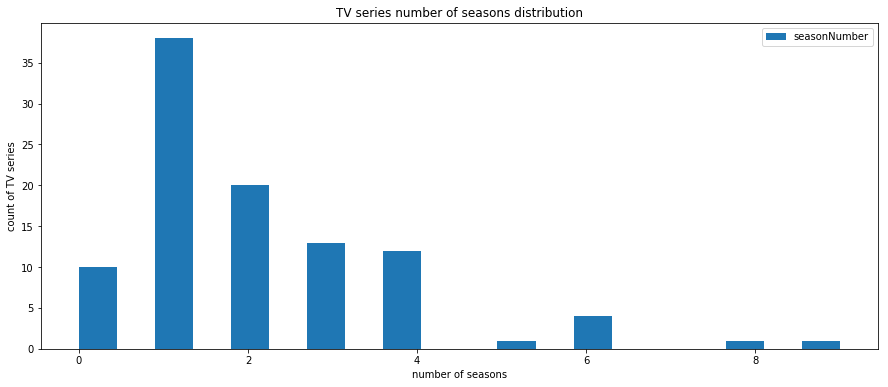

In [185]:
import matplotlib.pyplot as plt
df = pd.read_sql_query("""
SELECT TB.tconst, IFNULL(TE.seasonNumber, 0) AS seasonNumber
FROM IMDb.title_basic as TB
LEFT JOIN IMDb.title_episode as TE
    ON TB.tconst = TE.tconst
WHERE TB.titleType = 'tvEpisode'
""", mydb)
df.plot.hist(bins=20, figsize=(15,6))
plt.title("TV series number of seasons distribution")
plt.ylabel('count of TV series')
plt.xlabel('number of seasons')

### Task 11
Write a query to retrieve the names and ages of all actors who appeared in more than two movies (but not TV Movies) which an above average rating. Show the results of the query in your notebook. Do not hard code the average rating.

1. We first join name_basic, name_basic_primaryProfession, primaryProfession to get the person who is actor, and also join with title_basic, principal and title_rating to get the title and rating that thiis actor appear in. Using GROUP BY anf AVG, we get the average rating of all the titles(not only movies) of this actor. Set it as subTable.
2. Then we join the subTable with name_basic, name_basic_primaryProfession, primaryProfession, title_basic, principal and title_rating again, filter the actor and movie type title and finially compare the rating with average rating in subTable to get the movie that above the average rating. Using GROUP BY and COUNT to get the number of movies that are above average rating. Set it as secondTable.
3. Finally we join secondTable with name_basic and filter the person with more than 2 movies which an above average rating.

In [188]:
df = pd.read_sql_query("""
SELECT NBA.primaryName, NBA.age
FROM IMDb.name_basic as NBA,
    (SELECT NB.nconst, COUNT(DISTINCT TR.tconst) as numMoviesAboveAvg
     FROM IMDb.name_basic as NB, IMDb.title_rating as TR, IMDb.title_basic as TB, IMDb.principal as TP, IMDb.name_basic_primaryProfession as NBP, IMDb.primaryProfession AS TPP,
        (SELECT NB.nconst, AVG(TR.averageRating) as average
         FROM IMDb.name_basic as NB, IMDb.title_rating as TR, IMDb.title_basic as TB, IMDb.principal as TP, IMDb.name_basic_primaryProfession as NBP, IMDb.primaryProfession AS TPP
         WHERE NB.nconst = TP.nconst AND TP.tconst = TB.tconst AND TB.tconst = TR.tconst AND NB.nconst = NBP.nconst AND TPP.primaryProfessionId = NBP.primaryProfessionId AND TPP.primaryProfession = 'actor'
         GROUP BY NB.nconst) as subTable
     WHERE NB.nconst = TP.nconst AND TP.tconst = TB.tconst AND TB.tconst = TR.tconst AND subTable.nconst = NB.nconst AND NB.nconst = NBP.nconst AND TPP.primaryProfessionId = NBP.primaryProfessionId 
      AND TPP.primaryProfession = 'actor' AND TB.titleType = 'movie' AND TR.averageRating > subTable.average
     GROUP BY NB.nconst) as secondTable
WHERE NBA.nconst = secondTable.nconst and secondTable.numMoviesAboveAvg > 2
""", mydb)
df.head()

,primaryName,age


As we can see the query result above is all empty. It's because we only load part of the data and the number of movie is small.

In order to test thiis query, we insert some movies into 'principal' table manually, so that the actors have appeared in more movies and the resutls are shown below.

In [191]:
cursor.execute("""
INSERT INTO `IMDb`.`principal`
(`tconst`,
`ordering`,
`nconst`,
`category`,
`job`,
`characters`)
VALUES
('tt0000335', 1, 'nm0183947', 'actor', NULL, NULL), ('tt0000502', 1, 'nm0183947', 'actor', NULL, NULL), 
('tt0000574', 1, 'nm0183947', 'actor', NULL, NULL), ('tt0000009', 5, 'nm0183947', 'actor', NULL, NULL), 
('tt0000335', 2, 'nm0183823', 'actor', NULL, NULL), ('tt0000502', 2, 'nm0183823', 'actor', NULL, NULL), 
('tt0000574', 2, 'nm0183823', 'actor', NULL, NULL)
""")

df = pd.read_sql_query("""
SELECT NBA.primaryName, NBA.age
FROM IMDb.name_basic as NBA,
    (SELECT NB.nconst, COUNT(DISTINCT TR.tconst) as numMoviesAboveAvg
     FROM IMDb.name_basic as NB, IMDb.title_rating as TR, IMDb.title_basic as TB, IMDb.principal as TP, IMDb.name_basic_primaryProfession as NBP, IMDb.primaryProfession AS TPP,
        (SELECT NB.nconst, AVG(TR.averageRating) as average
         FROM IMDb.name_basic as NB, IMDb.title_rating as TR, IMDb.title_basic as TB, IMDb.principal as TP, IMDb.name_basic_primaryProfession as NBP, IMDb.primaryProfession AS TPP
         WHERE NB.nconst = TP.nconst AND TP.tconst = TB.tconst AND TB.tconst = TR.tconst AND NB.nconst = NBP.nconst AND TPP.primaryProfessionId = NBP.primaryProfessionId AND TPP.primaryProfession = 'actor'
         GROUP BY NB.nconst) as subTable
     WHERE NB.nconst = TP.nconst AND TP.tconst = TB.tconst AND TB.tconst = TR.tconst AND subTable.nconst = NB.nconst AND NB.nconst = NBP.nconst AND TPP.primaryProfessionId = NBP.primaryProfessionId 
      AND TPP.primaryProfession = 'actor' AND TB.titleType = 'movie' AND TR.averageRating > subTable.average
     GROUP BY NB.nconst) as secondTable
WHERE NBA.nconst = secondTable.nconst and secondTable.numMoviesAboveAvg > 2
""", mydb)
df.head()

,primaryName,age
0,William Courtenay,58
1,Peter Courtney,29


Then it has results now.